## Cargar Datos 

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


3


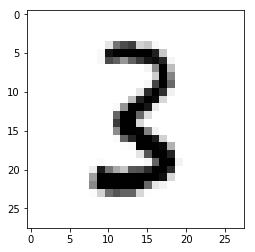

In [3]:
import matplotlib.pyplot as plt

image_index = 50000 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

##  Reducir Data set
Esto se hizo para no trabajar con todos los datos en un inicio.

Primero se separan las imagenes por números, luego se escogén al azar 1000 imagenes de cada número, obteniendo 
un data ser de 10,000 imagenes,  1000 por cada número
 

In [4]:
list_index = []
for x in range(10):
    idex= y_train==x
    list_index.append(idex)
    
listtx=[]
listty=[]
for indexs in list_index:
    numberx = x_train[indexs]
    numbery = y_train[indexs]
    listtx.append(numberx)
    listty.append(numbery)
    


print(len(listtx),len(listty))

10 10


In [5]:
import numpy as np
new_matrixx =[]
new_matrixy = np.array([])

for data in listtx:
    indices = np.arange(len(data))
    rnd_indices = np.random.choice(indices, size=1000)
    result= data[rnd_indices]
    for img in result:
        new_matrixx.append(img)

new_matrixx= np.array(new_matrixx)
for data in listty:
    indices = np.arange(len(data))
    rnd_indices = np.random.choice(indices, size=1000)
    result= data[rnd_indices]
    new_matrixy = np.concatenate((new_matrixy,result),axis=0)

print(new_matrixx.shape,new_matrixy.shape)


(10000, 28, 28) (10000,)


## Sumas

Cambiar   el valor entre 0 y 1 para sumar vertical o Horizatalmente

In [14]:
matrix_final = []
for imagen in new_matrixx:
    matrix = np.asmatrix(imagen)
    vec_result = matrix.sum(axis=1)
    matrix_final.append(vec_result)
matrix_final=np.asmatrix(np.array(matrix_final))
print(matrix_final.shape)

(10000, 28)


## PCA

In [6]:
matrix_final = []
for imagen in new_matrixx:
    vector = imagen.flatten()
    matrix_final.append(vector)
matrix_final=np.asmatrix(np.array(matrix_final))
print(matrix_final.shape)
    

(10000, 784)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(matrix_final) 

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

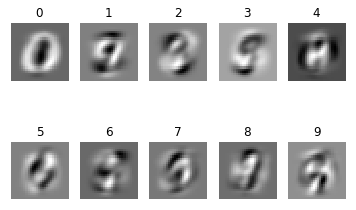

In [12]:
V = pca.components_
import pylab
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
i=1
for x in range(10):
    ax = subplot(2,5,i,frame_on=False)
    ax.xaxis.set_major_locator(NullLocator()) 
    ax.yaxis.set_major_locator(NullLocator())
    imshow(V[x].reshape(28,28))
    title(str(x))
    gray()
    i=i+1

gray()
pylab.show()

In [14]:
pca_matrix =[]
for vector in matrix_final:
    proyection = pca.transform(vector)
    pca_matrix.append(proyection)
matrix_final=np.asmatrix(np.array(pca_matrix))
print(matrix_final.shape)

(10000, 10)


In [15]:
np.savetxt("xdata.csv", matrix_final, delimiter=",")
np.savetxt("ydata.csv",new_matrixy,delimiter=",")